In [1]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

In [2]:
import pandas as pd
data=pd.read_csv('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/동계인턴십_Data_1000/phenotype_1000.txt',engine="python",sep=" ")

In [3]:
df=data.loc[:,['AGE_B', 'SMOK_B', 'ALCO_B','EXER_B','HT_B', 'WT_B', 'WAIST_B', 'SBP_B', 'DBP_B', 'CHO_B','LDL_B', 'TG_B', 'HDL_B', 'FBS_B', 'GOT_B', 'GPT_B', 'GGT_B', 'URIC_B','BIL', 'WBC', 'CREAT', 'STOMA', 'COLON', 'LIVER', 'LUNG','PROST', 'THROI', 'BREAC', 'RECTM','SEX1', 'CRC']]
df.head()

,AGE_B,SMOK_B,ALCO_B,EXER_B,HT_B,WT_B,WAIST_B,SBP_B,DBP_B,CHO_B,...,STOMA,COLON,LIVER,LUNG,PROST,THROI,BREAC,RECTM,SEX1,CRC
0,48,3.0,2.0,1.0,168.0,69.8,82.0,102.0,69.0,196.0,...,0,0,0,0,0,0,0,0,1,0
1,53,1.0,2.0,1.0,161.0,67.9,86.0,127.0,67.0,159.0,...,0,0,0,0,0,0,1,0,2,0
2,60,1.0,1.0,2.0,153.0,73.3,97.0,133.0,76.0,198.0,...,0,0,0,0,0,0,0,0,2,0
3,42,1.0,2.0,2.0,167.0,65.1,77.5,97.0,70.0,139.0,...,1,0,0,0,0,0,0,0,1,0
4,57,3.0,2.0,2.0,165.0,51.8,73.0,98.0,76.0,166.0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df.dropna(inplace=True)

중요도 0.5 까지만 잘라서 시행해봤다.

In [5]:
#폐암 
features=['LUNG','STOMA','COLON','LIVER','LUNG','PROST','THROI','BREAC','RECTM']
y_df =df['LUNG']
#X_df =df.drop(features, axis=1)
X_df =df[['AGE_B','GOT_B','SBP_B','LDL_B','HDL_B','DBP_B','CHO_B','WT_B','FBS_B','GPT_B']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(630, 10) (158, 10)


DMatrix : 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트

주요 입력 파라미터는 data(피처 데이터 세트)와 label
(분류: 레이블 데이터 세트/회귀: 숫자형인 종속값 데이터 세트)
판다스의 DataFrame으로 데이터 인터페이스를 하기 위해서는 DataFrame.values를 이용해 넘파이로 일차변환 한 뒤에 DMatrix 변환을 적용

In [7]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [8]:
params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 500

In [9]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[21:21:28] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60923	eval-logloss:0.60765
[1]	train-logloss:0.54068	eval-logloss:0.53720
[2]	train-logloss:0.48331	eval-logloss:0.47776
[3]	train-logloss:0.43502	eval-logloss:0.42800
[4]	train-logloss:0.39360	eval-logloss:0.38523
[5]	train-logloss:0.35772	eval-logloss:0.34868
[6]	train-logloss:0.32702	eval-logloss:0.31687
[7]	train-logloss:0.30010	eval-logloss:0.28914
[8]	train-logloss:0.27678	eval-logloss:0.26491
[9]	train-logloss:0.25569	eval-logloss:0.24347
[10]	train-logloss:0.23766	eval-logloss:0.22481
[11]	train-logloss:0.22176	eval-logloss:0.20834
[12]	train-logloss:0.20771	eval-logloss:0.19373
[13]	train-logloss:0.19501	eval-logloss:0.18105
[14

In [10]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.024 0.    0.001 0.001 0.001 0.    0.352 0.001 0.    0.   ]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기

In [11]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [12]:
get_clf_eval(y_test, preds)

오차행렬:
 [[156   0]
 [  2   0]]

정확도: 0.9873
정밀도: 0.0000
재현율: 0.0000
F1: 0.0000
AUC: 0.5000


C:\Users\dudtj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [14]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [15]:
print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

630 158


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

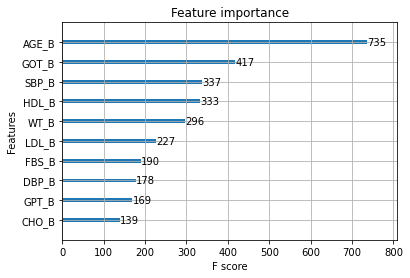

In [16]:
xgboost.plot_importance(xgb_model)

In [17]:
predictions = xgb_model.predict(X_test)
predictions

array([ 1.1127043e-01,  6.8258390e-02,  7.1890652e-03,  1.5056075e-02,
        4.1382890e-03, -1.1524919e-03,  1.9375670e-01, -1.0768454e-02,
       -2.3155578e-03, -2.9713809e-03, -2.6511438e-03, -6.5623336e-03,
       -5.7581847e-04,  1.3490940e-03,  1.0373342e-01, -1.8499714e-03,
        7.5435666e-03,  3.4693751e-01,  1.4214181e-02,  8.9113042e-02,
       -2.8496133e-03, -1.6291272e-02,  3.9107564e-01,  9.4114766e-03,
       -8.9353882e-03,  1.5792841e-01,  9.4083400e-04,  1.3370648e-01,
        5.4097626e-02,  2.2453202e-02,  2.3821413e-03,  6.8857926e-01,
        7.2255181e-03, -7.8866882e-03, -4.4136089e-03, -2.2258172e-03,
       -6.0425210e-04,  5.8353078e-02,  3.8462952e-02,  4.1659813e-02,
       -3.0410555e-03,  9.6252553e-02,  8.1100278e-02, -1.0125579e-02,
        4.2182885e-02,  5.4981422e-01, -4.5396071e-03, -3.9471327e-03,
       -7.0742267e-04, -3.4599372e-03, -1.4107388e-03,  4.6904981e-01,
        1.6769674e-01, -3.0992345e-03,  1.7282130e-02, -7.0817806e-03,
      

In [18]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions,y_test))

0.9823083194001561
-0.6897421085440194


lightgbm 데이터셋

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import lightgbm as lgb

In [20]:
train_x, test_x, train_y, test_y = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [21]:
dtrain_l = lgb.Dataset(train_x, label = train_y) 
dtest_l = lgb.Dataset(test_x, label = test_y) 

In [22]:
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [23]:
model = lgb.train(params, dtrain_l, 1000, dtest_l, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 630, number of used features: 10
[LightGBM] [Info] Start training from score 0.026984
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [24]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [25]:
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)

In [26]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  0.03422305183164377
R2 score:  0.06321900666101443


In [27]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [28]:
final_result.columns = ['label','predict']

<AxesSubplot:xlabel='label', ylabel='predict'>

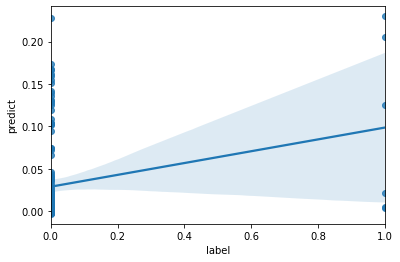

In [29]:
sns.regplot(x = 'label', y = 'predict', data = final_result)